<a href="https://colab.research.google.com/github/a2r4vind/Machine-Learning-Models/blob/main/Comparing_Learning_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aim : Comparing Learning Rates

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# Load and prepare MNIST dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Define simple feedforward neural network

In [8]:
def create_model(learning_rate):
  model = Sequential(
      [
          Flatten(input_shape=(28, 28)),
          Dense(128, activation='relu'),
          Dense(10, activation='softmax')
      ]
  )
  optimizer = SGD(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [9]:
# List of learning rate to compare
learning_rates = [0.01, 0.05, 0.1]


In [11]:
# Train and evaluate the model with each learning rate
history_dict = {}
for lr in learning_rates:
  print(f'Training with learning rate {lr}....')
  model = create_model(lr)
  history = model.fit(x_train, y_train, epochs=10, batch_size= 32, validation_split= 0.2, verbose=1)
  history_dict[lr] = history

Training with learning rate 0.01....


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6856 - loss: 1.1729 - val_accuracy: 0.9023 - val_loss: 0.3780
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8947 - loss: 0.3821 - val_accuracy: 0.9157 - val_loss: 0.3042
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9089 - loss: 0.3217 - val_accuracy: 0.9227 - val_loss: 0.2716
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9221 - loss: 0.2807 - val_accuracy: 0.9310 - val_loss: 0.2482
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9267 - loss: 0.2624 - val_accuracy: 0.9346 - val_loss: 0.2315
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9337 - loss: 0.2382 - val_accuracy: 0.9396 - val_loss: 0.2184
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9356 - loss: 0.2267 - val_accuracy: 0.9432 - val_loss: 0.2065
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9416 - loss: 0.2093 - 

# Plot training loss and validation loss for each learning rate

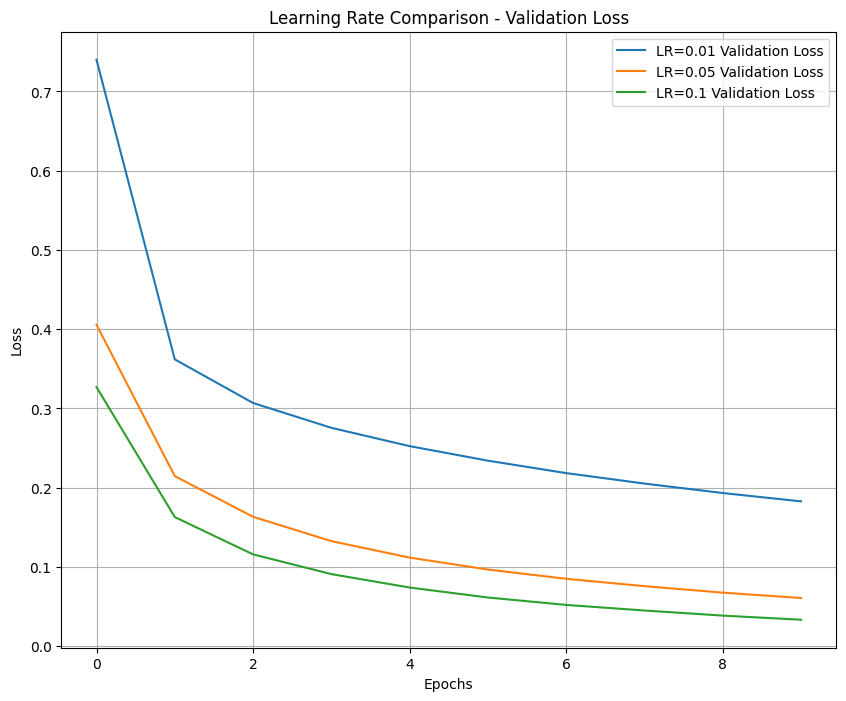

In [13]:
plt.figure(figsize=(10, 8))
for lr, history in history_dict.items():
  plt.plot(history.history['loss'], label=f'LR={lr} Validation Loss')
plt.title('Learning Rate Comparison - Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

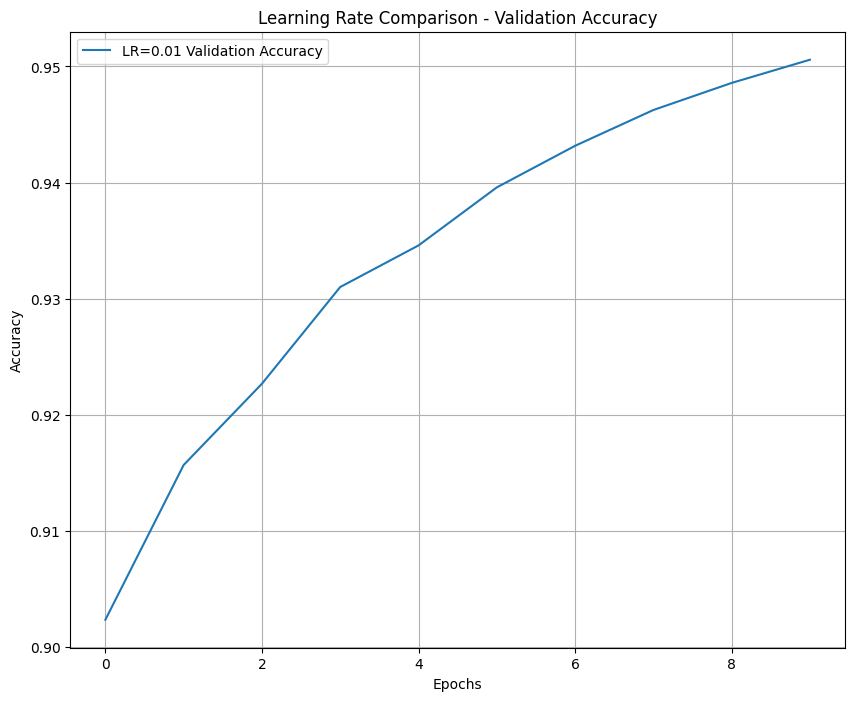

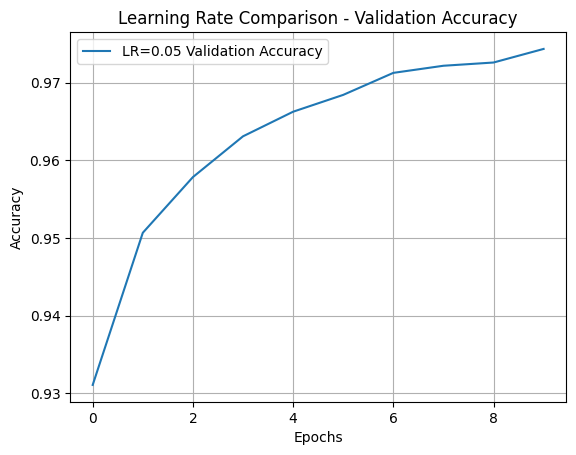

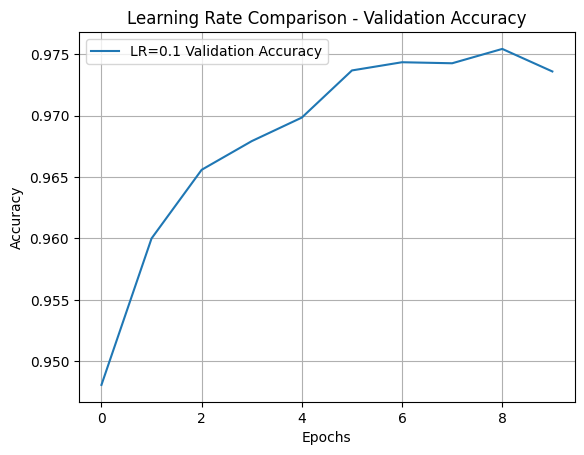

In [14]:
plt.figure(figsize=(10, 8))
for lr, history in history_dict.items():
  plt.plot(history.history['val_accuracy'], label=f"LR={lr} Validation Accuracy")
  plt.title("Learning Rate Comparison - Validation Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.grid(True)
  plt.show()